In [1]:
from sympy import *
#import pandas as pd
from IPython.display import Image, display, display_html
from sympy.plotting import plot as plot_sympy

from numpy import linspace
import matplotlib.pyplot as mpl
import numpy as np

In [2]:
init_printing() 

In [3]:
x = Symbol('x')

In [77]:
def get_print_derivate(ecuacion, orden=1, search='minimo', separador=1, step=0.1):
    """
    search: minimo, maximo o indefinido
    """
    dicc_result = {}
    if search not in ('minimo', 'maximo', 'indefinido'):
        print("Tipo de pto crítico inválido")
    
    derivada = ecuacion.diff(x, orden)
    
    print("1- Obtenemos la derivada: ")
    display(nsimplify(derivada, tolerance=0.001, rational=True))
    
    try:
        fact = factor(derivada)
        display("-----derivada factorizada:    ", fact)
        fact = factor(derivada)
        display("-----factorizado con formato:    ", nsimplify(fact, tolerance=0.001, rational=True))
    except:
        print("Error en factorización")

    print("-"*100)
    solutions = solve(derivada)
    display("2- Hallamos los Puntos críticos:      ", ' '.join([str(_) for _ in solutions]))

    if solutions:
        print("-"*100)
        print("3- Calculamos la 2da derivada: ")
        derivada_2 = ecuacion.diff(x, orden + 1)
        fact_2 = nsimplify(derivada_2, tolerance=0.001, rational=True)
        display(nsimplify(fact_2, tolerance=0.001, rational=True))
    print("-"*100)
    
    print("4- Identificamos los máximos y mínimos relativos: ")
    
    
    for ptocritic in solutions:
        try:
            r = fact_2.subs(x, ptocritic)
            y = ecuacion.subs(x, ptocritic)
            
            dicc_result[ptocritic] = {
                'y': y,
                'category': 'maximo' if r < 0 else('minimo' if r > 0 else 'indefinido'),
                'punto': (ptocritic, y)
            }
            
            print(
                (ptocritic, y),
                (Rational(ptocritic), Rational(ecuacion.subs(x, ptocritic))),
                ' : ', dicc_result[ptocritic]['category']
            )
        except Exception as e:
            print("Error con punto crítico:  ", ptocritic, " , detalle: ", str(e))
            
        
    # Get solucion
    rspta = list({k:v for k, v in dicc_result.items() if v['category'] == search}.keys())[0]
    
    print("")
    print("-"*100)
    print("Solucion: ", rspta)
    # SHow
    x_vals_1 = np.arange(rspta - separador, rspta + separador, step)
    y_vals_1 = lambdify(x, ecuacion, 'numpy')(x_vals_1)

    mpl.plot(x_vals_1, y_vals_1, 'bd', rspta,  ecuacion.subs(x, rspta), 'ro')
    mpl.show()
        
    return rspta

# 1 -----------------------------------------

Una pequeña compañía debe alquilar ayuda temporal que es más cara para complementar su personal de tiempo completo. Se estima que los costos semanales de salarios y beneficios se relacionan con el número m de empleados de tiempo completo por la función:

In [78]:
func_1 = 250*x + (16000/x) + 1000
cm = nsimplify(func_1, tolerance=0.001, rational=True)
cm

¿Cuántos empleados de tiempo completo deberían tener la compañía para minimizar esos
costos? Respuesta: m = 8 empleados

### Solución:

1- Obtenemos la derivada: 


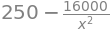

'-----derivada factorizada:    '

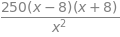

'-----factorizado con formato:    '

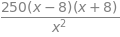

----------------------------------------------------------------------------------------------------


'2- Hallamos los Puntos críticos:      '

'-8 8'

----------------------------------------------------------------------------------------------------
3- Calculamos la 2da derivada: 


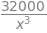

----------------------------------------------------------------------------------------------------
4- Identificamos los máximos y mínimos relativos: 
(-8, -3000) (-8, -3000)  :  maximo
(8, 5000) (8, 5000)  :  minimo

----------------------------------------------------------------------------------------------------
Solucion:  8


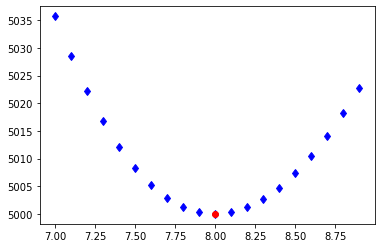

In [79]:
rspta_1 = get_print_derivate(cm)

# 3 -----------------------------------------

Suponga que la función de costo total por la fabricación de cierto producto es :

In [80]:
cx = 0.2*(0.01*x**2 + 121)
cx

dólares, donde x representa las unidades producidas. Encuentre el nivel de producción que minimizará
el costo promedio.
Respuesta: x = 110 unidades 

### Solucion

In [81]:
costo_promedio = cx / x
costo_promedio

1- Obtenemos la derivada: 


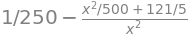

'-----derivada factorizada:    '

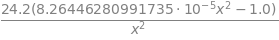

'-----factorizado con formato:    '

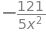

----------------------------------------------------------------------------------------------------


'2- Hallamos los Puntos críticos:      '

'-110.000000000000 110.000000000000'

----------------------------------------------------------------------------------------------------
3- Calculamos la 2da derivada: 


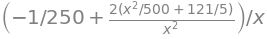

----------------------------------------------------------------------------------------------------
4- Identificamos los máximos y mínimos relativos: 
(-110.000000000000, -0.440000000000000) (-110, -3963167672086037/9007199254740992)  :  maximo
(110.000000000000, 0.440000000000000) (110, 3963167672086037/9007199254740992)  :  minimo

----------------------------------------------------------------------------------------------------
Solucion:  110.000000000000


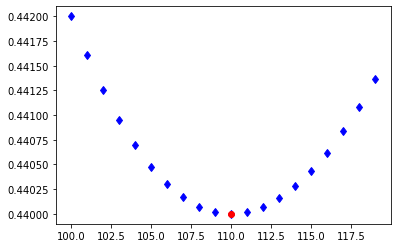

In [83]:
rspta_3 = get_print_derivate(costo_promedio, separador=10, step=1)

# 4 -----------------------------------------

El costo total mensual, en dólares, por la fabricación de x unidades de la cámara modelo MI en la
corporación de instrumentos de precisión Cannon está dado por la función :

In [84]:
cx = 0.0025*x**2 + 80*x + 10000
cx

a) Obtén la función de costo promedio

In [85]:
costo_promedio_4 = cx/x
nsimplify(costo_promedio, tolerance=0.001, rational=True)

b) Proporciona el nivel de producción que arroje el menor costo promedio de producción

1- Obtenemos la derivada: 


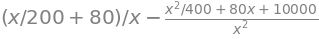

'-----derivada factorizada:    '

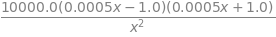

'-----factorizado con formato:    '

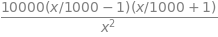

----------------------------------------------------------------------------------------------------


'2- Hallamos los Puntos críticos:      '

'-2000.00000000000 2000.00000000000'

----------------------------------------------------------------------------------------------------
3- Calculamos la 2da derivada: 


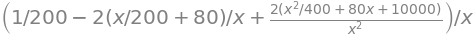

----------------------------------------------------------------------------------------------------
4- Identificamos los máximos y mínimos relativos: 
(-2000.00000000000, 70.0000000000000) (-2000, 70)  :  maximo
(2000.00000000000, 90.0000000000000) (2000, 90)  :  minimo

----------------------------------------------------------------------------------------------------
Solucion:  2000.00000000000


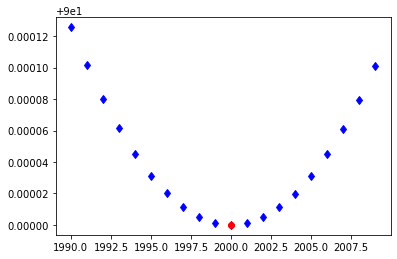

In [103]:
rspta_4 = get_print_derivate(costo_promedio_4, separador=10, step=1)

# 12 -----------------------------------------

Suponga que la ecuación de demanda para el producto de un monopolista es:

In [87]:
px = 400 -2*x
px

In [88]:
cx = x*(0.2*x + 4 + 400/x)
cx

 donde x es el número de unidades, p
precio y
C
se expresan en dólares por unidad

a) Determinar el nivel de producción en el que se maximiza la utilidad.

In [89]:
Ix = px*x
Ix

In [90]:
Ux = Ix - cx
Ux

1- Obtenemos la derivada: 


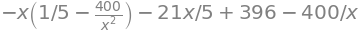

'-----derivada factorizada:    '

'-----factorizado con formato:    '

----------------------------------------------------------------------------------------------------


'2- Hallamos los Puntos críticos:      '

'90.0000000000000'

----------------------------------------------------------------------------------------------------
3- Calculamos la 2da derivada: 


----------------------------------------------------------------------------------------------------
4- Identificamos los máximos y mínimos relativos: 
(90.0000000000000, 17420.0000000000) (90, 17420)  :  maximo

----------------------------------------------------------------------------------------------------
Solucion:  90.0000000000000


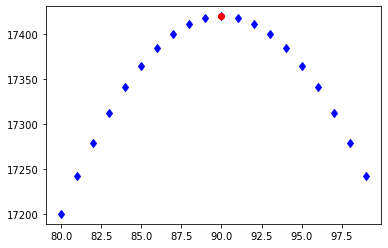

In [108]:
rspta_12 = get_print_derivate(Ux, search='maximo', separador=10, step=1)

In [92]:
rspta_12

b) Determinar el precio en que ocurre la utilidad máxima

In [93]:
px.subs(x, rspta_12)

c) Determinar la utilidad máxima.

In [94]:
Ux.subs(x, rspta_12)

# 13 -----------------------------------------

In [113]:
def get_maxima_utilidad(funcion_costo, funcion_demanda, **kwargs):
    Ix = funcion_demanda*x
    display("Ingreso total: ", Ix)
    print("-"*100)
    
    Ux = Ix - funcion_costo
    display("UTILIDAD: ", Ux)
    print("-"*100)
    
    nivel_produccion = get_print_derivate(Ux, search='maximo', **kwargs)
    
    return nivel_produccion

La cantidad mensual demandada del disco de Walter Serkin con la Sonata Claro de Luna de Beethoven,
producida por Phonola, se relaciona con el precio por disco. La ecuación de la demanda está dada por

In [114]:
px = - 0.00042*x + 6
px

donde p denota el precio unitario en dólares y x es el número de
discos demandados. El costo total mensual en dólares por la impresión y empacado de x copias de este
disco clásico está dado por

In [115]:
cx = 600 + 2*x - 0.00002*x**2
cx

¿Cuántas copias mensuales
debe producir Phonola para maximizar sus utilidades?

#### Solucion

'Ingreso total: '

----------------------------------------------------------------------------------------------------


'UTILIDAD: '

----------------------------------------------------------------------------------------------------
1- Obtenemos la derivada: 


'-----derivada factorizada:    '

'-----factorizado con formato:    '

----------------------------------------------------------------------------------------------------


'2- Hallamos los Puntos críticos:      '

'5000.00000000000'

----------------------------------------------------------------------------------------------------
3- Calculamos la 2da derivada: 


----------------------------------------------------------------------------------------------------
4- Identificamos los máximos y mínimos relativos: 
(5000.00000000000, 9400.00000000000) (5000, 9400)  :  maximo

----------------------------------------------------------------------------------------------------
Solucion:  5000.00000000000


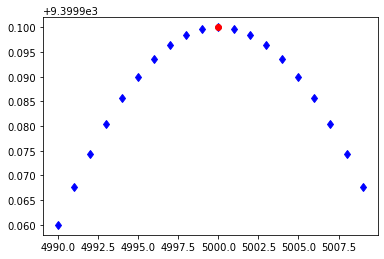

In [116]:
rspta_13 = get_maxima_utilidad(cx, px, separador=10, step=1)

#### Rspta

In [99]:
rspta_13

# 14 -----------------------------------------

Un fabricante de raquetas de tenis ha determinado que el costo total C(x) (en dólares) por la producción
de x raquetas por día está dado por

In [100]:
cx = 400 + 4*x + 0.0001*x**2
cx

. Cada raqueta debe venderse a un
precio de p dólares, donde p se relaciona con x mediante la ecuación de demanda:

In [101]:
px = 10 - 0.0004*x
px

 Si es posible vender todas las raquetas fabricadas, ¿cuál es el nivel diario de producción
que rinde la utilidad máxima para el fabricante?

#### Solucion

'Ingreso total: '

----------------------------------------------------------------------------------------------------


'UTILIDAD: '

----------------------------------------------------------------------------------------------------
1- Obtenemos la derivada: 


'-----derivada factorizada:    '

'-----factorizado con formato:    '

----------------------------------------------------------------------------------------------------


'2- Hallamos los Puntos críticos:      '

'5000.00000000000'

----------------------------------------------------------------------------------------------------
3- Calculamos la 2da derivada: 


----------------------------------------------------------------------------------------------------
4- Identificamos los máximos y mínimos relativos: 
(5000.00000000000, 9400.00000000000) (5000, 9400)  :  maximo

----------------------------------------------------------------------------------------------------
Solucion:  5000.00000000000


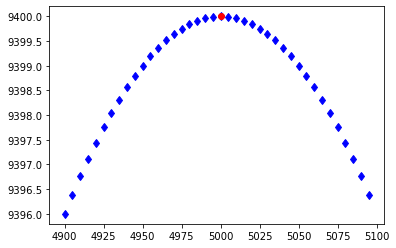

In [118]:
get_maxima_utilidad(cx, px, separador=100, step=5)